In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# Data loading
file_path = Path("Instructions/myopia.csv")
df = pd.read_csv(file_path)
df.head(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1,0
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1,0
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0,0


In [3]:
# Remove the MYOPIC Column
df = df.drop(columns=["MYOPIC"])
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [4]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['AL', 'VCD', 'SPORTHR', 
                                                'DIOPTERHR', 'TVHR', 'READHR']])
scaled_data

array([[-0.89286146, -1.0197916 ,  4.1506609 ,  0.49830393,  0.18405806,
         1.69744958],
       [-0.1718398 , -0.13076253, -0.99889822, -0.87508755, -0.34093217,
        -0.91206246],
       [-0.00997682,  0.21580879,  0.25709181, -0.75023378,  0.18405806,
        -0.91206246],
       ...,
       [ 0.65218736,  0.77333517, -0.49650221, -1.37450264, -0.86592239,
        -0.91206246],
       [-0.84871624, -1.11020051,  0.0058938 , -0.18839181,  1.05904178,
        -0.25968445],
       [-0.34841504, -0.19103561,  1.63868084, -0.75023378,  0.18405806,
        -0.91206246]])

In [5]:
# Initialize PCA model
pca = PCA(n_components=0.90)

# Get two principal components for the data.
df_pca = pca.fit_transform(scaled_data)


In [6]:
# Transform PCA data to a DataFrame
df_myopia_pca = pd.DataFrame(
    data=df_pca, columns=["principal component 1", "principal component 2", "principal component 3", "principal component 4"])
df_myopia_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4
0,0.840304,2.618153,-1.271562,-3.557169
1,-1.183279,-0.985556,0.096978,0.612439
2,-0.395256,-0.849213,-0.786137,-0.140176
3,0.350559,2.230667,1.600631,-1.311326
4,0.169306,-2.391718,0.076719,-0.716916


In [7]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.35503903, 0.28911872, 0.17105169, 0.14473782])

In [8]:
# Initialize the K-Means model
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(df_myopia_pca)

# Predict clusters
predictions = model.predict(df_myopia_pca)

# Add the predicted class columns
df_myopia_pca["class"] = model.labels_
df_myopia_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,class
0,0.840304,2.618153,-1.271562,-3.557169,1
1,-1.183279,-0.985556,0.096978,0.612439,0
2,-0.395256,-0.849213,-0.786137,-0.140176,3
3,0.350559,2.230667,1.600631,-1.311326,1
4,0.169306,-2.391718,0.076719,-0.716916,2


In [9]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

In [10]:
# Reduce dimensions
tsne_features = tsne.fit_transform(df_myopia_pca)

In [11]:
# The dataset has 2 columns
tsne_features.shape

(618, 2)

In [12]:
# Prepare to plot the dataset

# The first column of transformed features
df_myopia_pca['x'] = tsne_features[:,0]

# The second column of transformed features
df_myopia_pca['y'] = tsne_features[:,1]

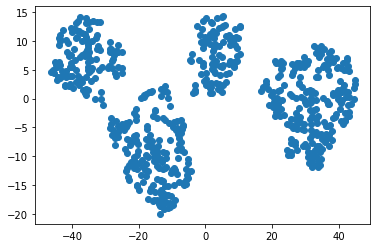

In [13]:
# Visualize the clusters
plt.scatter(df_myopia_pca['x'], df_myopia_pca['y'])
plt.show()

C:\Users\emman\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


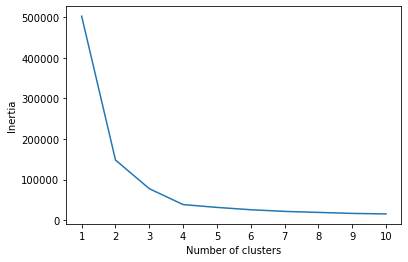

In [14]:
inertia = []
# Same as k = list(range(1, 10))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_myopia_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()